In [2]:
import sys, os
import numpy as np
import time, h5py
codepath = '/user_data/mmhender/imStat/code'
sys.path.append(codepath)
from utils import default_paths, nsd_utils, numpy_utils, stats_utils, prf_utils
from plotting import plot_utils
from model_fitting import initialize_fitting 

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import scipy.stats


In [3]:
# load semantic discrim results

subject = 1
which_prf_grid = 5
# Params for the spatial aspect of the model (possible pRFs)
models = initialize_fitting.get_prf_models(which_grid=which_prf_grid)    
n_prfs = models.shape[0]

save_name_groups = os.path.join(default_paths.stim_labels_root,'All_concat_labelgroupnames.npy')
groups = np.load(save_name_groups, allow_pickle=True).item()
discrim_type_list = groups['discrim_type_list']
n_discrim_types = len(discrim_type_list)

feature_type_list = ['gabor_solo','pyramid_texture_ll','pyramid_texture_hl_pca','sketch_tokens',\
                    'alexnet','clip']
ncomp2avg = [np.nan, np.nan, 5, np.nan, 5, 5]
feature_folders = [default_paths.gabor_texture_feat_path,default_paths.pyramid_texture_feat_path,\
                  default_paths.pyramid_texture_feat_path, default_paths.sketch_token_feat_path, \
                  default_paths.alexnet_feat_path, default_paths.clip_feat_path]
 
sem_corrs = []
sem_tstat = []
avg_corrs = np.zeros((len(feature_type_list), n_discrim_types, n_prfs))
avg_tstats = np.zeros((len(feature_type_list), n_discrim_types, n_prfs))
max_corrs = np.zeros((len(feature_type_list), n_discrim_types, n_prfs))
max_tstats = np.zeros((len(feature_type_list), n_discrim_types, n_prfs))
nsamp = np.zeros((len(feature_type_list), n_discrim_types, n_prfs, 2))

for ff in range(len(feature_type_list)):
    
    feature_type = feature_type_list[ff]

    path_to_load = os.path.join(feature_folders[ff], 'feature_stats')

    fn2save1 = os.path.join(path_to_load, \
                   'S%d_%s_semantic_corrs_grid%d.npy'%(subject, feature_type,which_prf_grid))
    fn2save2 = os.path.join(path_to_load, \
                   'S%d_%s_semantic_discrim_tstat_grid%d.npy'%(subject, feature_type,which_prf_grid))
    fn2save3 = os.path.join(path_to_load, \
                   'S%d_%s_nsamp_grid%d.npy'%(subject, feature_type,which_prf_grid))

   
    print('loading from %s and %s and %s'%(fn2save1, fn2save2, fn2save3))
    corr_result = np.load(fn2save1,allow_pickle=True)
    sem_corrs.append(corr_result)
    
    tstat_result = np.load(fn2save2,allow_pickle=True)
    sem_tstat.append(corr_result)
        
    if not np.isnan(ncomp2avg[ff]):
        print('avg first %d features'%ncomp2avg[ff])
        feats2use = np.arange(ncomp2avg[ff])
    else:
        print('avg first %d features'%corr_result.shape[0])
        feats2use = np.arange(corr_result.shape[0]);
    
    avg_corrs[ff,:,:] = np.mean(np.abs(corr_result[feats2use,:,:]), axis=0).T
    avg_tstats[ff,:,:] = np.mean(np.abs(tstat_result[feats2use,:,:]), axis=0).T
    max_corrs[ff,:,:] = np.max(np.abs(corr_result[:,:,:]), axis=0).T
    max_tstats[ff,:,:] = np.max(np.abs(tstat_result[:,:,:]), axis=0).T
      
    nsamp_result = np.load(fn2save3,allow_pickle=True)
    nsamp[ff,:,:,:] = np.moveaxis(nsamp_result, [0,1,2],[1,0,2])
    


loading from /user_data/mmhender/features/gabor_texture/feature_stats/S1_gabor_solo_semantic_corrs_grid5.npy and /user_data/mmhender/features/gabor_texture/feature_stats/S1_gabor_solo_semantic_discrim_tstat_grid5.npy and /user_data/mmhender/features/gabor_texture/feature_stats/S1_gabor_solo_nsamp_grid5.npy
avg first 96 features


ValueError: could not broadcast input array from shape (55,1456) into shape (56,1456)

In [ ]:
sdlkfjfkgjxnv,mn

In [50]:
# exclude any pRFs for which there were fewer than 10 trials

assert(np.all(nsamp[0,:,:,:]==nsamp[1:,:,:,:]))

min_thresh = 10
inds_exclude = np.any(nsamp[0,:,:,:]<min_thresh, axis=2)
inds_exclude.shape

avg_corrs[:,inds_exclude] = np.nan
avg_tstats[:,inds_exclude] = np.nan
max_corrs[:,inds_exclude] = np.nan
max_tstats[:,inds_exclude] = np.nan


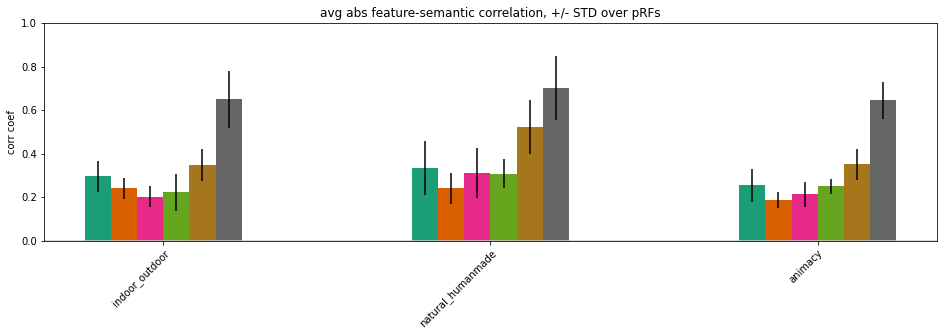

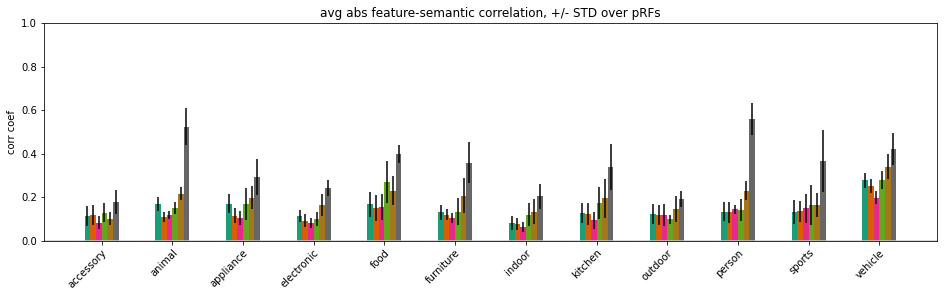

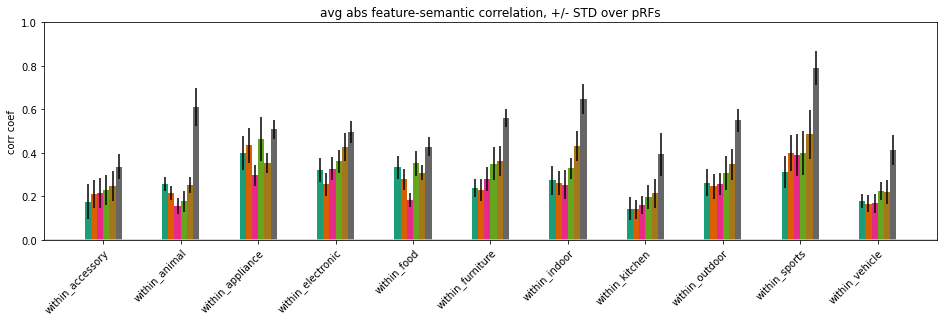

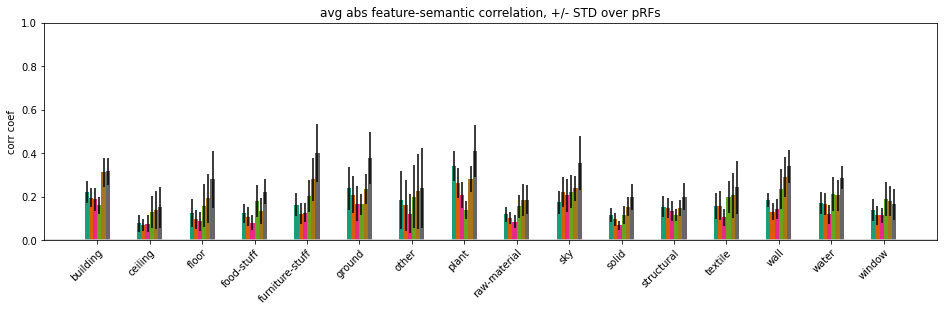

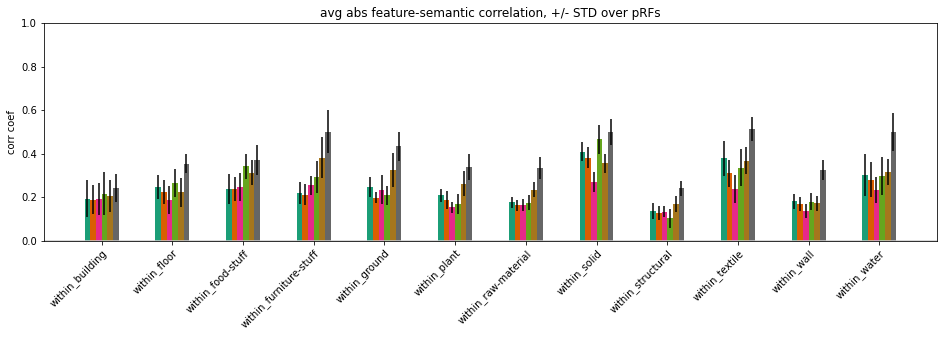

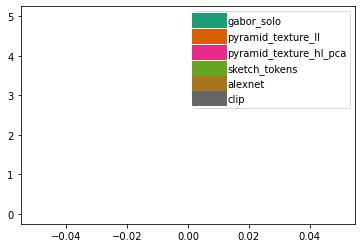

In [51]:
inds_list = [np.arange(0,3), np.arange(3,15), np.arange(15,26), np.arange(26,42), np.arange(42,54)]

feature_colors = cm.Dark2(np.linspace(0,1,len(feature_type_list)))

for ii, inds in enumerate(inds_list):
    
#     mean_vals = np.nanmean(avg_corrs[:,inds,:], axis=2).T;
#     std_vals = np.nanstd(avg_corrs[:,inds,:], axis=2).T;
    mean_vals = np.nanmean(max_corrs[:,inds,:], axis=2).T;
    std_vals = np.nanstd(max_corrs[:,inds,:], axis=2).T;
    
    title = 'avg abs feature-semantic correlation, +/- STD over pRFs'

    if ii==len(inds_list)-1:
        legend_separate=True
    else:
        legend_separate=False
        
    plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=std_vals, colors=feature_colors, space=0.3, \
                    xticklabels=np.array(discrim_type_list)[inds], ylabel='corr coef', \
                    ylim=[0,1], title=title, horizontal_line_pos=0,\
                    legend_labels=feature_type_list, \
                    legend_overlaid=False, legend_separate=legend_separate, \
                    fig_size=(16,4))

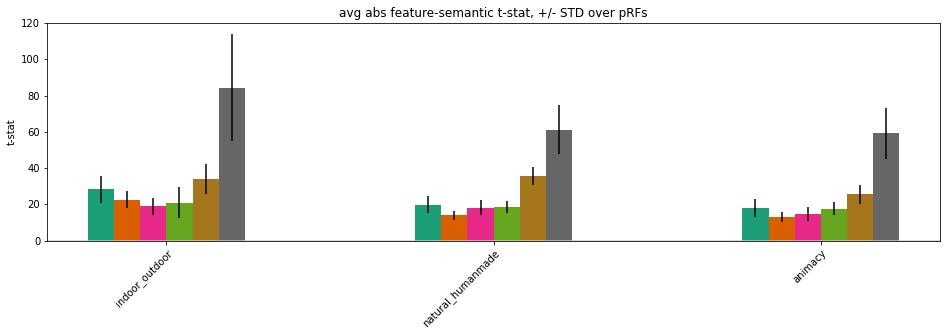

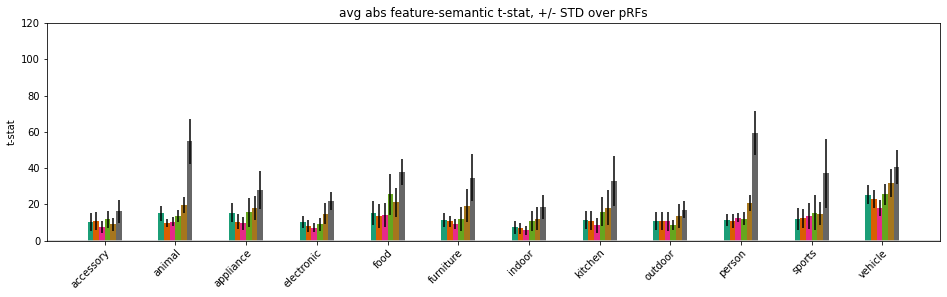

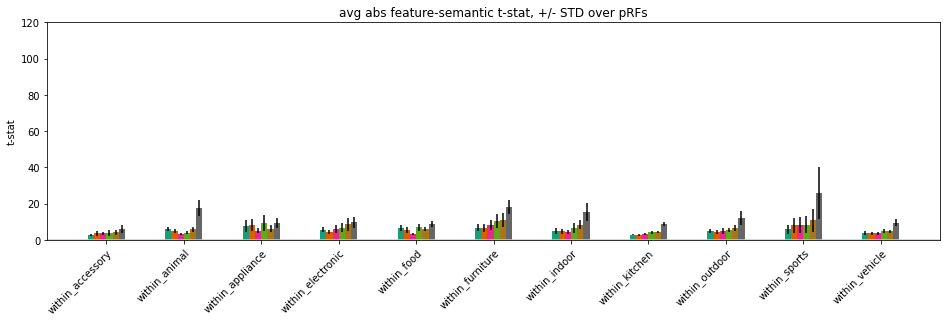

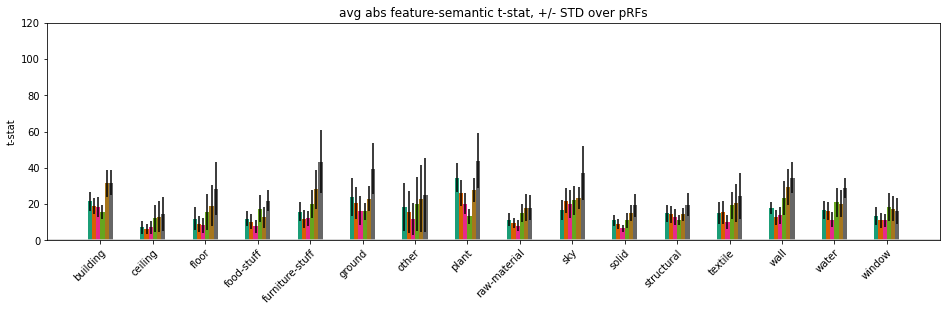

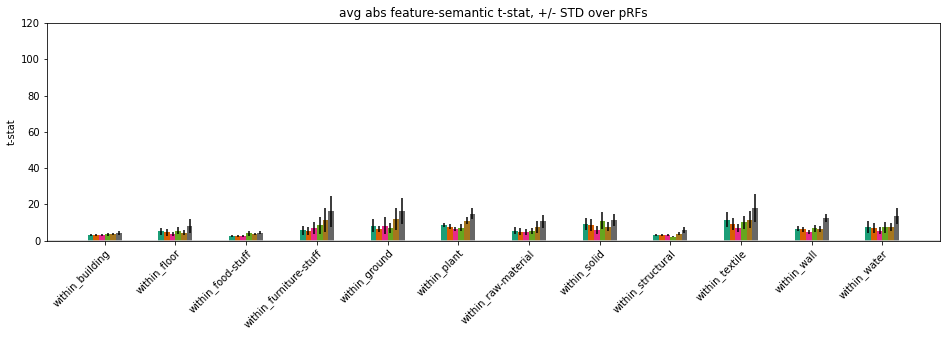

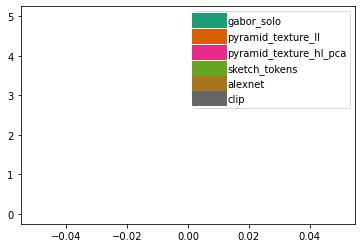

In [41]:
inds_list = [np.arange(0,3), np.arange(3,15), np.arange(15,26), np.arange(26,42), np.arange(42,54)]

feature_colors = cm.Dark2(np.linspace(0,1,len(feature_type_list)))

for ii, inds in enumerate(inds_list):
    
#     mean_vals = np.nanmean(avg_tstats[:,inds,:], axis=2).T;
#     std_vals = np.nanstd(avg_tstats[:,inds,:], axis=2).T;
    mean_vals = np.nanmean(max_tstats[:,inds,:], axis=2).T;
    std_vals = np.nanstd(max_tstats[:,inds,:], axis=2).T;
    
    title = 'avg abs feature-semantic t-stat, +/- STD over pRFs'

    if ii==len(inds_list)-1:
        legend_separate=True
    else:
        legend_separate=False
        
    plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=std_vals, colors=feature_colors, space=0.3, \
                    xticklabels=np.array(discrim_type_list)[inds], ylabel='t-stat', \
                    ylim=[0,120], title=title, horizontal_line_pos=0,\
                    legend_labels=feature_type_list, \
                    legend_overlaid=False, legend_separate=legend_separate, \
                    fig_size=(16,4))